In [118]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
from sklearn import linear_model
from patsy import dmatrices
import scipy as sp
import statsmodels.api as sm
from sklearn import cross_validation as cv
from sklearn import metrics
%matplotlib inline

In [186]:
with open('violent_words.txt', 'r') as vio:
    read_data = vio.read()
violent_list = read_data.split(',')
violent = []
for word in violent_list:
    word = word[1:].lower()
    violent.append(word)
s_violent = sorted(violent)
s_violent[:4]

['acid', 'aggression', 'aggressive', 'aggressor']

In [92]:
final_luther_df = pd.read_csv('final_luther_df.csv')

In [111]:
def eval_dict(x):
    return dict(eval(x))

def cnt_v_words(x):
    counter = 0
    for key, value in x.items():
        if key in s_violent:
            counter += value
    return counter
    

def standardize(i):
    return ((i - vw_pct_mean)/vw_pct_std)

In [106]:
#final_luther_df['movie_script'] = final_luther_df['movie_script'].apply(eval_dict)
final_luther_df['v_w_cnt'] = final_luther_df['movie_script'].apply(cnt_v_words)

In [187]:
final_luther_df.head(2)

,Unnamed: 0,Unnamed: 0_x,title,fb_score_norm,fb_banned_wc,script_wc,movie_script,Unnamed: 0_y,rank,studio,...,genre_sportsdrama,genre_spy,genre_summerdrama,genre_virtualreality,genre_whatifcomedy,v_w_cnt,v_w_pct,z_score,bct_vw_pct,bct_ratings
0,0,0,10thingsihateaboutyou,10.208562,93,9110,"{'peanuts': 1, 'much': 7, 'confused': 2, 'kids...",2056,22,BV,...,0.0,0.0,0.0,0.0,0.0,137,0.015038,-0.816244,-1.980971,52.145734
1,1,0,10thingsihateaboutyou,10.208562,93,9110,"{'peanuts': 1, 'much': 7, 'confused': 2, 'kids...",4362,16,BV,...,0.0,0.0,0.0,0.0,0.0,137,0.015038,-0.816244,-1.980971,52.145734


In [122]:
script_wc = final_luther_df['script_wc'].tolist()
v_w_cnt = final_luther_df['v_w_cnt'].tolist()
final_luther_df['v_w_pct'] = [float(v_w_cnt[i]/script_wc[i]) for i in range(len(script_wc))]
final_luther_df['z_score'] = final_luther_df['v_w_pct'].apply(standardize)

In [113]:
vw_pct_mean = final_luther_df['v_w_pct'].mean()
vw_pct_std = final_luther_df['v_w_pct'].std()
print(vw_pct_mean)
print(vw_pct_std)

0.02290008467378136
0.009631509181754235


In [126]:
newM, lmbdaM = sp.stats.boxcox(final_luther_df['v_w_pct'])
newM = list(newM)
print(newM[:4])
final_luther_df['bct_vw_pct'] = newM

[-1.9809705008145171, -1.9809705008145171, -1.9215017214079155, -1.9215017214079155]


In [143]:
bct_ratings, lmbdaM = sp.stats.boxcox(final_luther_df['ratings'])
bct_ratings = list(bct_ratings)
print(bct_ratings[:4])
final_luther_df['bct_ratings'] = bct_ratings

[52.145733631006543, 52.145733631006543, 59.633363741894847, 59.633363741894847]


In [124]:
final_luther_df.head(2)

,Unnamed: 0,Unnamed: 0_x,title,fb_score_norm,fb_banned_wc,script_wc,movie_script,Unnamed: 0_y,rank,studio,...,genre_spoof,genre_sportsdrama,genre_spy,genre_summerdrama,genre_virtualreality,genre_whatifcomedy,v_w_cnt,v_w_pct,z_score,bct_vw_pct
0,0,0,10thingsihateaboutyou,10.208562,93,9110,"{'peanuts': 1, 'much': 7, 'confused': 2, 'kids...",2056,22,BV,...,0.0,0.0,0.0,0.0,0.0,0.0,137,0.015038,-0.816244,-1.980971
1,1,0,10thingsihateaboutyou,10.208562,93,9110,"{'peanuts': 1, 'much': 7, 'confused': 2, 'kids...",4362,16,BV,...,0.0,0.0,0.0,0.0,0.0,0.0,137,0.015038,-0.816244,-1.980971


In [86]:
# plt.title('Word Count vs. Ratings Plot')
# plt.axis([0, 25000, 2, 11])
#plt.plot(np.array(act_data_df['script_wc']), np.array(act_data_df['ratings']), 'x' )
# plt.savefig('mvp1.png', format='png')

In [45]:
#merged_dff['theaters'] == '2,311'

In [9]:
# word_score = merged_dff['fb_score_norm'].tolist()
# ratings = merged_dff['ratings'].tolist()
# plt.plot(word_score, ratings, 'x')
# plt.axis([0, 40, 0, 11])
# plt.title('Unrefined Word Score vs. Ratings Plot')
# plt.savefig('mvp2.png', format='png')

In [144]:
action_df = final_luther_df[final_luther_df['genre_action'] == 1]
len(action_df)

359

In [221]:
act_data_df = action_df[['script_wc', 'lifetime_gross', 'bct_ratings', 'bct_vw_pct']]
act_data_df.describe()

,script_wc,lifetime_gross,bct_ratings,bct_vw_pct
count,359.000000,3.580000e+02,359.000000,359.000000
mean,12198.740947,8.685698e+07,46.681443,-1.869856
std,2972.029531,9.152747e+07,16.429922,0.068438
min,288.000000,5.613100e+04,2.753400,-2.198190
25%,11018.000000,2.678192e+07,37.413490,-1.913872
50%,12246.000000,5.611755e+07,45.242932,-1.869596
75%,13963.500000,1.205407e+08,59.633364,-1.825536
max,23305.000000,7.605076e+08,88.183845,-1.571846


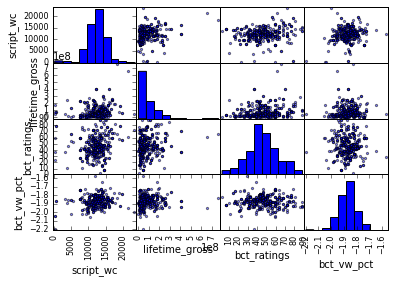

In [222]:
fig = pd.tools.plotting.scatter_matrix(act_data_df)
# plt.figure(figsize=(50,50))
# plt.savefig('mat_plot.png', dpi=300)

#fig

In [227]:
y, X = dmatrices('bct_ratings ~ script_wc + bct_vw_pct', data = act_data_df, return_type = 'dataframe')

In [228]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            bct_ratings   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.556
Date:                Fri, 15 Jul 2016   Prob (F-statistic):             0.0111
Time:                        11:45:07   Log-Likelihood:                -1509.2
No. Observations:                 359   AIC:                             3024.
Df Residuals:                     356   BIC:                             3036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.9498     24.716      0.645      0.519       -32.657    64.557
script_wc      0.0009      0.000      3.000      0.003         0.000     0.001
bct_vw_pct   -10.6891     12.749     -0.838      0.402       -35.762    14.384
==============================================================================
Omnibus:                        0.282   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.152
Skew:                           0.039   Prob(JB):                        0.927
Kurtosis:                       3.065   Cond. No.                     4.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
results.summary()
res_all = []
for res in results:
    low, upp = res.confint().T   # unpack columns 
    res_all.append(numpy.concatenate(([res.llf], res.params, res.tvalues, res.pvalues, 
                   low, upp)))

TypeError: 'RegressionResultsWrapper' object is not iterable

In [174]:
m, n = dmatrices('bct_ratings ~ script_wc ', data = act_data_df, return_type = 'dataframe')

In [175]:
model2 = sm.OLS(m,n)
results2 = model2.fit()

In [206]:
#results2.summary()

In [183]:
a, b = dmatrices('lifetime_gross ~ script_wc + bct_vw_pct', data = act_data_df, return_type = 'dataframe')

In [184]:
model3 = sm.OLS(a,b)
results3 = model3.fit()

In [208]:
#results3.summary()

In [196]:
c, d = dmatrices('lifetime_gross ~ script_wc + bct_vw_pct', data = act_data_df, return_type = 'dataframe')
model4 = sm.OLS(c,d)
results4 = model4.fit()
#results3.summary()

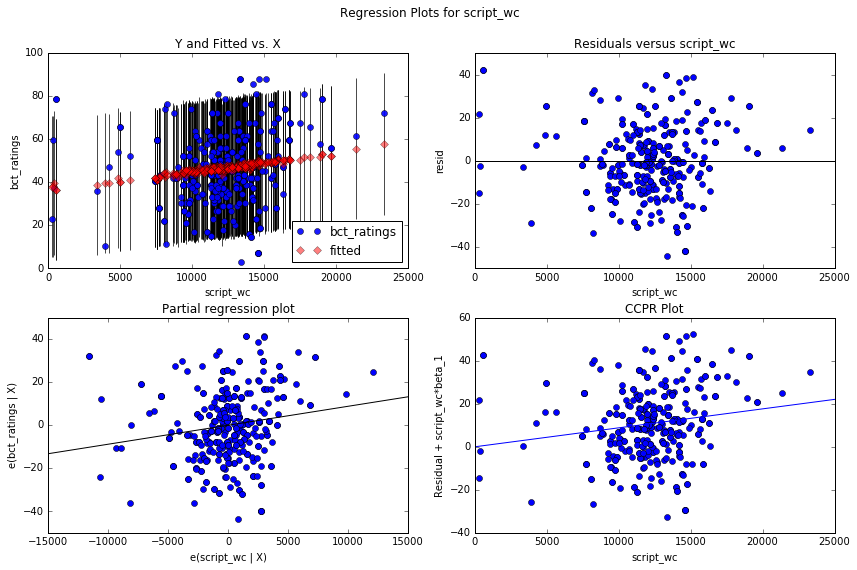

In [204]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results,'script_wc', fig=fig)

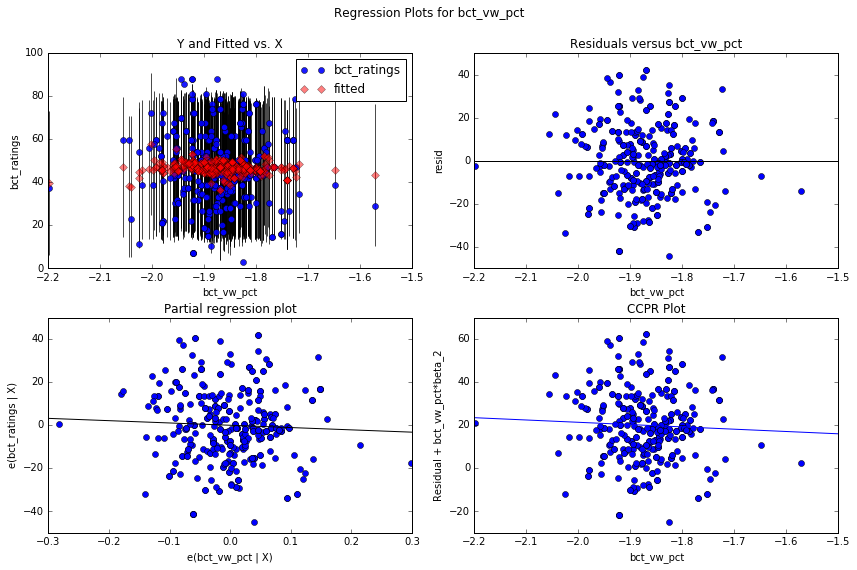

In [223]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results,'bct_vw_pct', fig=fig)

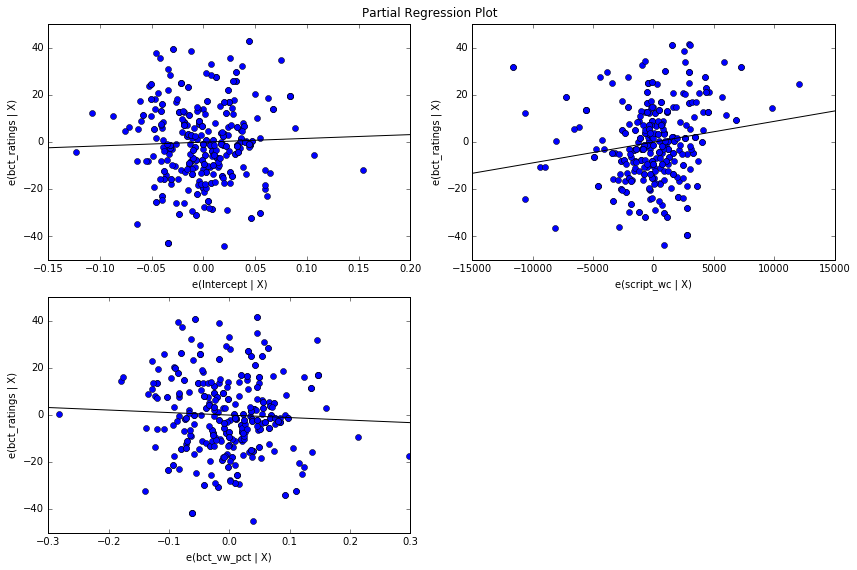

In [217]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)